In [1]:
# load library

from mmhuman3d.core.conventions.keypoints_mapping import convert_kps
from mmhuman3d.models.body_models.smpl import SMPL
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Function to remove keypoints with NaN values
def remove_nan_keypoints(keypoints_2d):
    # Filter out keypoints that are not NaN
    valid_keypoints = keypoints_2d[~np.isnan(keypoints_2d).any(axis=1)]
    return valid_keypoints

# Function to visualize 2D keypoints
def plot_keypoints_2d(keypoints_2d, image_width=640, image_height=480):
    valid_keypoints = remove_nan_keypoints(keypoints_2d)

    # Adjusting the scale of the coordinates
    max_x, max_y = np.max(valid_keypoints, axis=0)
    min_x, min_y = np.min(valid_keypoints, axis=0)

    # Scaling the coordinates if they are too small
    scale_x = image_width / (max_x - min_x) if max_x - min_x != 0 else 1
    scale_y = image_height / (max_y - min_y) if max_y - min_y != 0 else 1

    # Apply scaling to the coordinates
    valid_keypoints[:, 0] = (valid_keypoints[:, 0] - min_x) * scale_x
    valid_keypoints[:, 1] = (valid_keypoints[:, 1] - min_y) * scale_y

    plt.figure(figsize=(6, 6))
    plt.scatter(valid_keypoints[:, 0], valid_keypoints[:, 1], s=10, c='r', marker='o')

    # Label each keypoint with its index for visual distinction
    for i, (x, y) in enumerate(valid_keypoints):
        plt.text(x, y, str(i), fontsize=8, color='blue')

    # Dynamically set x and y axis limits
    plt.xlim(0, image_width)
    plt.ylim(0, image_height)
    plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinate system
    plt.title("2D Keypoints Visualization")
    plt.show()

In [4]:
# Load SMPL model
### you have to set path smpl model and npy_file_path(data)
smpl_model = SMPL(model_path='C:/Users/SMPL_python_v.1.1.0/smpl/models/basicmodel_neutral_lbs_10_207_0_v1.1.0.pkl', gender='neutral', batch_size=1)

#D:\data\honda\motionx_smplx-001\motion_data\smplx_322\dance\subset_0000
# Load data from npy file
npy_file_path = 'D:/data/motionx_smplx-001/motion_data/smplx_322/dance/subset_0000/Basic_Dai_DAnce_clip_1.npy'
npy_data = np.load(npy_file_path, allow_pickle=True)

# Extract necessary parameters from the data (explicitly specifying dtype)
betas = torch.tensor(npy_data[0, :10], dtype=torch.float32).unsqueeze(0)  # Shape parameters
body_pose = torch.tensor(npy_data[0, 10:79], dtype=torch.float32).unsqueeze(0)  # Body pose parameters
global_orient = torch.tensor(npy_data[0, 79:82], dtype=torch.float32).unsqueeze(0)  # Global orientation
transl = torch.tensor(npy_data[0, 82:85], dtype=torch.float32).unsqueeze(0)  # Translation

# Generate 3D keypoints using the SMPL model
output = smpl_model(betas=betas, body_pose=body_pose, global_orient=global_orient, transl=transl)


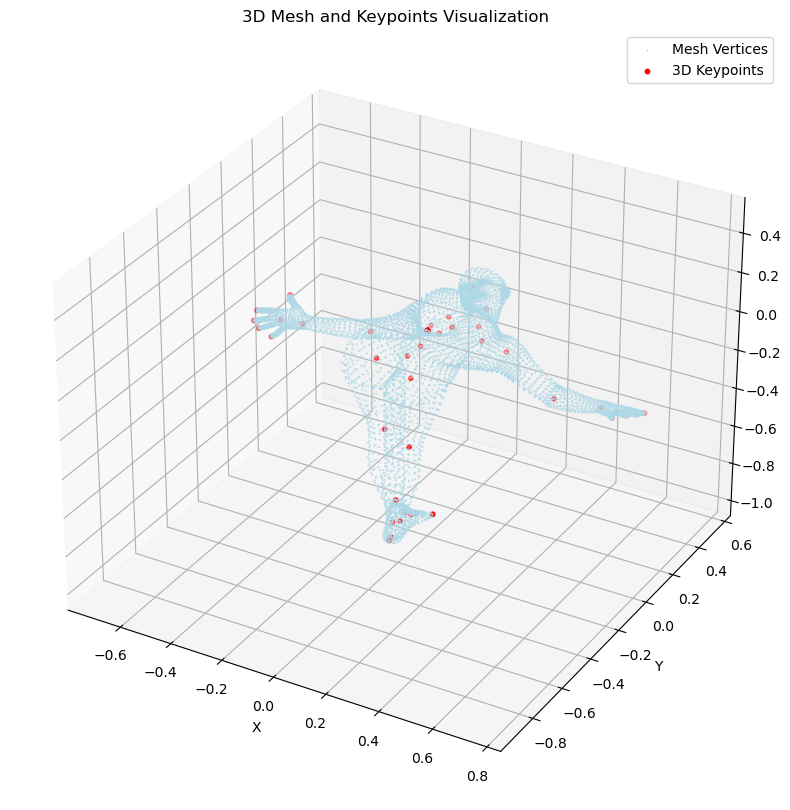

In [5]:
# Get 3D vertices and joints from the SMPL model
vertices = output['vertices'][0].cpu().numpy()  # 3D points of the mesh (vertices)
joints = output['joints'][0].cpu().numpy()  # 3D keypoints (joints)

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points of the mesh (vertices)
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=0.5, color='lightblue', alpha=0.6, label='Mesh Vertices')

# Plot the 3D keypoints (main body parts) (joints)
ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], s=10, color='red', label='3D Keypoints')

# Visualization settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set min and max values to align the axes for both mesh and keypoints
max_range = np.array([vertices[:, 0].max() - vertices[:, 0].min(),
                      vertices[:, 1].max() - vertices[:, 1].min(),
                      vertices[:, 2].max() - vertices[:, 2].min()]).max() / 2.0

mid_x = (vertices[:, 0].max() + vertices[:, 0].min()) * 0.5
mid_y = (vertices[:, 1].max() + vertices[:, 1].min()) * 0.5
mid_z = (vertices[:, 2].max() + vertices[:, 2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Add plot title and legend
ax.set_title("3D Mesh and Keypoints Visualization")
ax.legend()

# Display the visualization
plt.show()


MS-COCO Keypoints: 17
COCO WholeBody Keypoints: 113


C:\Users\byeol\AppData\Local\Temp\ipykernel_18564\695416849.py:74: RuntimeWarning: invalid value encountered in divide
  points_2d = points_3d[:, 1:3] / np.abs(points_3d[:, 0:1]) * focal_length


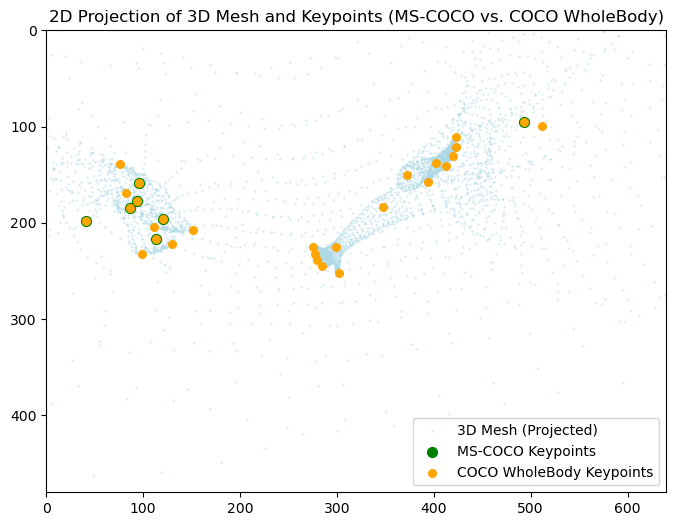

In [14]:
# SMPL 모델 로드
smpl_model = SMPL(model_path='C:/Users/SMPL_python_v.1.1.0/smpl/models/basicmodel_neutral_lbs_10_207_0_v1.1.0.pkl', gender='neutral', batch_size=1)

# 데이터 로드
npy_file_path = 'D:/data/motionx_smplx-001/motion_data/smplx_322/dance/subset_0000/Basic_Dai_DAnce_clip_1.npy'
npy_data = np.load(npy_file_path, allow_pickle=True)

# Extract necessary parameters from the data
betas = torch.tensor(npy_data[0, :10], dtype=torch.float32).unsqueeze(0)
body_pose = torch.tensor(npy_data[0, 10:79], dtype=torch.float32).unsqueeze(0)
global_orient = torch.tensor(npy_data[0, 79:82], dtype=torch.float32).unsqueeze(0)
transl = torch.tensor(npy_data[0, 82:85], dtype=torch.float32).unsqueeze(0)

# Generate 3D keypoints using the SMPL model
output = smpl_model(betas=betas, body_pose=body_pose, global_orient=global_orient, transl=transl)

# Get 3D joints from the SMPL model
meshopoints_3d = output['vertices']  # 3D points of the mesh (vertices)
keypoints_3d = output['joints'] # 3D keypoints

# Select the top 45 keypoints from the generated keypoints (adjust as needed)
keypoints_3d_45 = keypoints_3d[:, :150, :]  

# Project to 2D by dividing by the z-coordinate
keypoints_2d_45 = keypoints_3d_45[:, :, :2] / keypoints_3d_45[:, :, 2:3]

def convert_kps(keypoints, src, dst):
    if src == 'smpl_45' and dst == 'coco':
        # Correct mapping for MS-COCO (17 keypoints)
        coco_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
        return keypoints[:, coco_indices]
    elif src == 'smpl_45' and dst == 'coco_wholebody':
        # Correct mapping for COCO WholeBody (113 keypoints)
        wholebody_indices = list(range(113))  # Example index list
        return np.where(np.isnan(keypoints), np.nanmean(keypoints), keypoints)[:, wholebody_indices]
    else:
        raise ValueError("Unsupported conversion")

# Example usage
keypoints_coco = convert_kps(keypoints_2d_45.numpy(), src='smpl_45', dst='coco')
print("MS-COCO Keypoints:", len(keypoints_coco[0]))
#print(keypoints_coco)

keypoints_coco_wholebody = convert_kps(keypoints_2d_45.numpy(), src='smpl_45', dst='coco_wholebody')
print("COCO WholeBody Keypoints:", len(keypoints_coco_wholebody[0]))
#print(keypoints_coco_wholebody)

def visualize_keypoints(keypoints, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()  # Invert Y-axis for better visualization
    plt.show()

# Example usage with your keypoints
# Assuming `keypoints_coco` and `keypoints_coco_wholebody` are numpy arrays
#visualize_keypoints(keypoints_coco[0], "MS-COCO Keypoints")
#visualize_keypoints(keypoints_coco_wholebody[0], "COCO WholeBody Keypoints")

# set camera matrix
focal_length = 100  # focal length
image_center = np.array([320, 240])  # image center point

# camera projection (3D -> 2D)
def project_3d_to_2d(points_3d, focal_length, image_center):
    points_2d = points_3d[:, :2] / points_3d[:, 2:3] * focal_length
    points_2d += image_center
    return points_2d

def project_3d_to_2d(points_3d, focal_length, image_center):
    # project at X=0  (use only Y and Z coordinates)
    points_2d = points_3d[:, 1:3] / np.abs(points_3d[:, 0:1]) * focal_length
    points_2d += image_center[np.newaxis, :]
    return points_2d

"""
def project_3d_to_y0_plane(points_3d, focal_length, image_center):
    # project at Y=0 (use only X and Z coordinates)
    points_2d = points_3d[:, [0, 2]] / np.abs(points_3d[:, 1:2]) * focal_length
    points_2d += image_center[np.newaxis, :]
    return points_2d

def project_3d_to_z0_plane(points_3d, focal_length, image_center):
    #  z=0
    points_2d = points_3d[:, :2] / points_3d[:, 2:3] * focal_length
    points_2d += image_center[np.newaxis, :]  # add np.nexaxis to match the shape of image_center
    return points_2d
"""
# project 3D mesh and keypoints to 2D
vertices_2d = project_3d_to_2d(meshopoints_3d[0].cpu().numpy(), focal_length, image_center)
joints_2d = project_3d_to_2d(keypoints_3d[0].cpu().numpy(), focal_length, image_center)

# to visualize
fig, ax = plt.subplots(figsize=(8, 6))

# plot projected 2D mesh
ax.scatter(vertices_2d[:, 0], vertices_2d[:, 1], s=0.1, color='lightblue', label='3D Mesh (Projected)')

# plot MS-COCO keypoint (use part of joints)
ms_coco_keypoints_2d = joints_2d[:17]  # need to use practical MS-COCO keypoint index
ax.scatter(ms_coco_keypoints_2d[:, 0], ms_coco_keypoints_2d[:, 1], s=50, color='green', label='MS-COCO Keypoints')

# plot COCO WholeBody keypoint (use part of joints)
coco_wholebody_keypoints_2d = joints_2d[:133]  # need to use practical MS-COCO keypoint index
ax.scatter(coco_wholebody_keypoints_2d[:, 0], coco_wholebody_keypoints_2d[:, 1], s=30, color='orange', label='COCO WholeBody Keypoints')

# Image axis settings (range adjustment)
ax.set_xlim(0, 640)
ax.set_ylim(0, 480)
ax.invert_yaxis()

# Add labels and visualize
ax.set_title('2D Projection of 3D Mesh and Keypoints (MS-COCO vs. COCO WholeBody)')
ax.legend()
plt.show()
